In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.debugger import set_trace

In [2]:
%matplotlib inline
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#sns.set_style('ticks')

import utils
from reacher_def import RotReacherEnv

In [30]:
def plot_errors(make_new_data=False, models_dir='log', traj_num=2000, n_steps=28, max_action=0.1, save_dir=None, 
                            open_loop=False, epoch_num=None):
    if make_new_data:
        save_dir = utils.create_errors_dataset(models_dir=models_dir, traj_num=traj_num, n_steps=n_steps, max_action=max_action, 
                                                    save_dir=save_dir, open_loop=open_loop, epoch_num=epoch_num)
        
    try:
        if save_dir is None:
            save_dir = 'analysis/errors_no_planning.pkl'
        data = pd.read_pickle(save_dir)    
    except:
        print('Could not find file {}'.format(save_dir))
        return
    
    data.rename(columns={"# lstm units": "# LSTM units", 'timepoint': 'step'}, inplace=True)
    data['mode'] = data['mode'].map({'original': 'Original', 
                                     'rot': 'Rot', 
                                     'rotplus': 'Rot+'})
    g = sns.relplot(x="step", y="error (cm)", 
                    hue="mode", hue_order=['Rot', 'Rot+', 'Original'],
                    col="# LSTM units", height=5, kind="line", data=data, err_style="bars")
    return g.fig

def plot_reproduction(save_dir=None):
    try:
        if save_dir is None:
            save_dir = 'analysis/errors_no_planning.pkl'
        data = pd.read_pickle(save_dir)    
    except:
        print('Could not find file {}'.format(save_dir))
        return
    data.rename(columns={"# lstm units": "# LSTM units", 'timepoint': 'step'}, inplace=True)
    data['mode'] = data['mode'].map({'original': 'Original', 
                                     'rot': 'Rot', 
                                     'rotplus': 'Rot+'})
    data = data.loc[(data['mode']!='Original') & (data['# LSTM units']==100)]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    g = sns.lineplot(x="step", y="error (cm)", 
                     hue="mode", hue_order=['Rot', 'Rot+'],
                     err_style="bars", ax=ax, data=data)
    ax.legend(loc='upper right', frameon=False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return fig

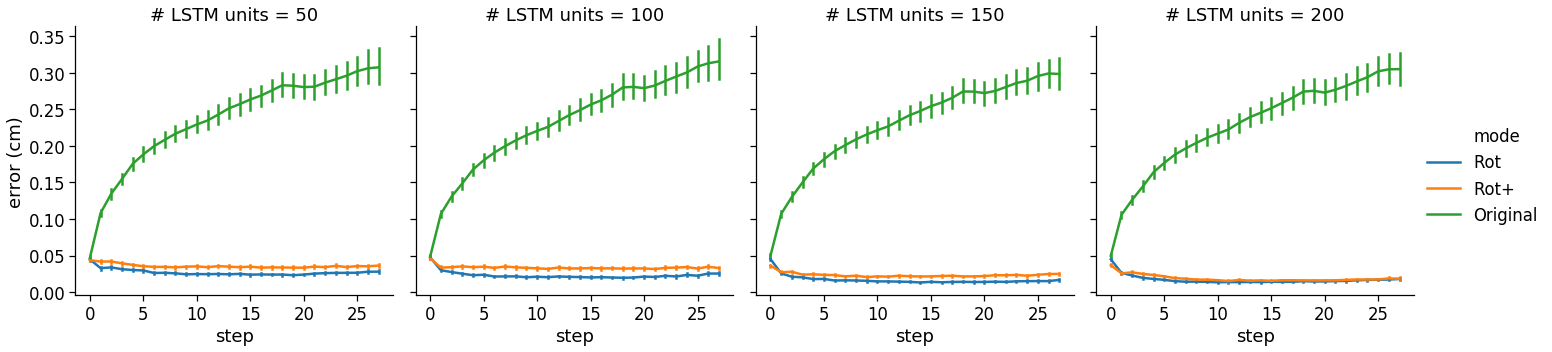

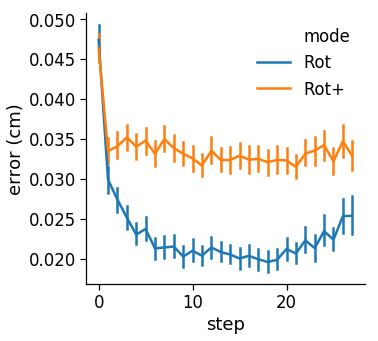

In [31]:
fig_errors = plot_errors(make_new_data=False, traj_num=500, max_action=0.2)
fig_reproduction = plot_reproduction()

In [32]:
fig_errors.savefig('figures/models_errors_no_planning.pdf', format='pdf')
fig_errors.savefig('figures/models_errors_no_planning.eps', format='eps')
fig_reproduction.savefig('figures/reproduction_errors_no_planning.pdf', format='pdf')
fig_reproduction.savefig('figures/reproduction_errors_no_planning.eps', format='eps')